# Computing network properties with NetworkX

In this exercise, you will get hands-on experience with NetworkX by calculating basic network properties. The dataset we use here is a network of Facebook friendships of students in Copenhagen, collected as part of the Copenhagen Networks study (see Sapiezynski et al., Scientific Data 6, 2019). The dataset edge list file

_Copenhagen_FB_edges.edg_

can be found on the course MyCourses page and in the 𝚌𝚘𝚞𝚛𝚜𝚎𝚍𝚊𝚝𝚊 directory on JupyterHub.

Use the Jupyter Notebook code template available at JupyterHub — you only need to fill in the required functions. First, to get you started, load the edge list file and visualize the network. If this works, continue with the template and run its code to answer the following questions.

You can also check the NetworkX online tutorial and index:

https://networkx.github.io/documentation/stable/tutorial.html
https://networkx.github.io/documentation/stable/reference/index.html

**Hint**: Check also the NetworkX [online tutorial](https://networkx.github.io/documentation/stable/tutorial.html) and [reference](https://networkx.github.io/documentation/stable/reference/index.html).


import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

If you are new to Matplotlib and want to learn how it works, see the following function.
With Matplotlib, we use two different types of objects: Figure objects and Axes objects.
The Figure object is the canvas that contains your plot(s) and is often abbreviated as `fig`.
The Axes object is a pair of axes (i.e., a plot) inside a figure object where your data will be plotted and is often abbreviated as `ax`.
The separation of Figure and Axes is useful when you wish to have multiple axes (subplots) in a single figure. 

Note that this is the so-called object-oriented interface (or the explicit API) of matplotlib.
There is also a MATLAB-like, less flexible interface called the pyplot interface (or implicit API).
We recommend using the object-oriented interface over the pyplot interface.
You can read about the difference between the two interfaces here: https://matplotlib.org/stable/users/explain/api_interfaces.html
and here: https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_distribution(y_values, x_values, style, x_label, y_label):
    """
    Plots the pre-calculated distribution y(x)
    Returns the figure object

    Parameters
    ----------
    y_values: list
        list of values corresponding to the pre-calculated distribution y(x)
    x_values: list
        the x values for plotting
    style: str
        style of the visualization ('bar' or 'logplot')
    x_label: str
        label of the x axis of the figure
    y_label: str
        label of the y axis of the figure
    """

    # You can create a figure object and an axis object inside it at once:
    fig, ax = plt.subplots() # Creates a new empty figure canvas and axis for the plot, and returns the objects as `fig` and `ax`

    # Equivalently, you can create a figure first and then add an axis to it in a separate step as follows. 
    # fig = plt.figure() 
    # ax = fig.add_subplot(111)

    # The first line creates a new figure canvas for the plot and returns the object as `fig`.
    # The second line creates a new axis object (`ax`) inside `fig`.
    # `add_subplot(111)` means adding the first subplot in an 1x1 grid of subplots; 
    # if you'd like to create, for example, the first subplot in an 2x2 grid, use `add_subplot(221)` 

    if style == 'bar': # for plotting a bar chart
        offset = 0.5
        ax.bar(np.array(x_values) - offset, y_values, width=0.5) 
        # makes Axes `ax` a bar chart with `xvalues - offset` as the x axis values and `y_values` as bar heights
    elif style == 'logplot': # for plotting on double log axes
        ax.plot(x_values, y_values, color='black', marker='.') 
        # makes `ax` a regular plot with black dots ('.')
        ax.set_xscale('log')
        ax.set_yscale('log')
        # sets the x and y axes to be on log scale; this turns the plot to a log-log plot
        # You can also create a log-log plot with the following command:
        # ax.loglog(x_values, y_values, 'k', marker='.')

    # As you can see from the above examples, `ax` has method functions for plotting different types of plots.
    # To make a plot, you pass the sequences of x and y values of the data separately to one of the plotting methods.
    # For example, the first data point in the data corresponds to `x_values[0]` and `y_values[0]`, 
    # the second data point corresponds to `x_values[1]` and `y_values[1]`, and so on.
    # Naturally, `x_values` and `y_values` must have the same length. Otherwise, you'll get an error.

    ax.set_xlabel(x_label) # sets the label of the x axis
    ax.set_ylabel(y_label) # sets the label of the y axis

    return fig # Returns the figure object for showing or saving or both

In [3]:
def calculate_and_plot_discrete_distribution(input_list, x_label, y_label):
    """
    Calculates and visualizes the discrete probability distribution of a variable
    whose values are given in input_list and returns the figure object

    Parameters
    ----------
    input_list: list
        a list of the variable values, e.g. node degrees
    x_label: str
        label of the x axis of the figure
    y_label: str
        label of the y axis of the figure

    Returns
    -------
    Nothing
    """
    assert len(input_list) > 0, "The input list should not be empty!"
    # Calculate the distribution:
    # np = NumPy, we use the ready-made function bincount that counts the number of non-negative integers
    # in the input_list, up to the max value in the input list, and returns an array of counts
    distribution = np.bincount(input_list)  
    # Normalize:
    distribution = distribution / len(input_list)
    # Visualize:
    min_range = 0
    max_range = max(input_list) + 1
    x_values = list(range(min_range, max_range)) # range(i,j) gives an iterator from i to j, list(range(i,j)) makes a list out of it.

    fig = plot_distribution(distribution, x_values, 'bar', x_label, y_label) # uses the function defined above

    return fig

In [4]:
def cdf(input_list):
    """
    Calculates the cumulative distribution function of input_list; cdf(k) = p that value smaller than k

    Parameters
    ----------
    input_list : list
        a list of numbers whose frequencies are used to compute the cdf

    Returns
    -------
    x_points: the values for which the cdf is computed
    cdf: np.array
        cdf for the above values 
    """
    input_array = np.array(input_list)
    x_points = np.unique(input_array) # np.unique gives back a sorted list of unique values in input_array
    cdf = []
    normalizer=float(input_array.size) # input_array.size is the same as len(input_array)

    for x in x_points:
        cdf.append((input_array[np.where(input_array < x)].size)/normalizer) # appends the share of entries in input_list with values < x

    return (x_points, np.array(cdf))

## Data
Let us load the data from the right folder and assign the names for all the plots we will save. If you run this notebook in your machine, please specify the right folder.

In [5]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = '.'
    # YOUR CODE HERE

print('The data directory is %s' % course_data_dir)

network_fname = os.path.join(course_data_dir, 'Copenhagen_FB_edges.edg')
if not(os.path.isfile(network_fname)):
    print("Error! This file doesn't exist: "+network_fname)

The data directory is /coursedata


### a. Visualization
Load the edge list and visualize the network. To achieve this, you will need to modify the function `load_network` first.
The split of the club should be reflected in the shape of the visualized network.

In [6]:
def load_network(network_fname):
    """
    A function for loading a network from an edgelist (.edg) file.

    Parameters
    ----------
    network_fname: full or relative path (including file name) of the .edg file

    Returns
    -------
    network: the loaded network as NetworkX Graph() object
    """
    net = None
    #TODO: use networkx to load in the network
    # See networkx documentation or the Python tutorial for help:
    # https://networkx.github.io/documentation/stable/reference/readwrite/
    # Look for a function that reads an edge file.
    # The file uses comma as the delimiter, so remember to specify that option (by default,
    # networkx assumes white space for some reason)
    # YOUR CODE HERE
    net = nx.read_edgelist(network_fname, delimiter=',')
    
    # The following two assertion statements stops the execution of
    # this program if the network is not correctly loaded:
    assert net is not None, "network was not correctly loaded"
    assert len(net) > 0, "network should contain at least one node"
    return net

Visualize the network using `nx.draw()` function. 
For details about NetworkX visualization, see https://networkx.org/documentation/stable/reference/drawing.html

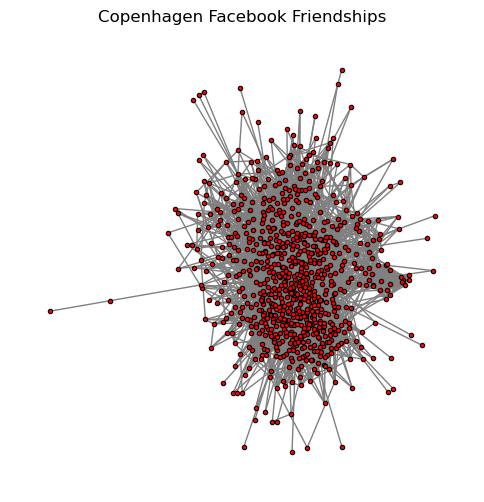

In [7]:
network = load_network(network_fname)
figure_title = 'Copenhagen Facebook Friendships'
fig_vis, ax_vis = plt.subplots(figsize=(6, 6))
nx.draw(network, ax=ax_vis, 
        node_size=10, node_color='red', # Controls the fill color and size of the nodes
        edgecolors='black', linewidths=0.8, # Controls the color and width of the node borders
        edge_color='gray', width=1 # Controls the color and width of the edges
)
ax_vis.set_title(figure_title); # Sets the title of the figure

In [8]:
# Once you are happy with the visualization, you can save it in a file with the following command:
figure_fname = 'Facebook_friendships.pdf'
# This save the file in the same directory as this notebook is in. 
# To save it in a different directory, specify the path:
# figure_fname = 'some_path/les-miserables.pdf'
fig_vis.savefig(figure_fname)

### b. Edge density
Calculate the edge density of the dolphin social network. First, write your own code without using the function `density` and then compare your result to the output of `networkx.density` (the corresponding NetworkX function).

In [9]:
def density(network):
    """
    Calculates the network edge density: D = 2*m / n(n-1) where m=# of edges, n=# of nodes

    Parameters
    ----------
    network: a NetworkX graph object

    Returns
    -------
    D: network edge density
    """
    D = None
    # YOUR CODE HERE
    edges = network.number_of_edges()
    nodes = network.number_of_nodes()
    D = 2*edges / (nodes*(nodes-1))
    #TODO: Replace the network density definition!
    # To do this, you need to access some basic properties of a networkx graph
    return D

In [10]:
D_own = density(network)
D_nx = nx.density(network)
print('D from self-written algorithm: ' + str(D_own))
print('D from NetworkX: ' + str(D_nx))

D from self-written algorithm: 0.020031210986267166
D from NetworkX: 0.020031210986267166


### c. Average shortest path length
Calculate the average shortest path length $ \langle l \rangle $. Here, you don't need to write your own algorithm. It is sufficient to use the relevant `networkx` function.

In [11]:
#TODO: to be replaced with a correct definition using a NetworkX function
l_nx = None 

# YOUR CODE HERE
l_nx = nx.average_shortest_path_length(network)
assert l_nx is not None, "Avg. path length has not been computed"
print('<l> from NetworkX: ' + str(l_nx))

<l> from NetworkX: 2.981598002496879


### d. Average clustering coefficient
Calculate the average clustering coefficient $ \langle c \rangle $ using the relevant ready-made `networkx` function. Please set the parameter `count_zeros=True` to include nodes with $c_i=0$.

In [12]:
#TODO: to be replaced with a correct definition using a NetworkX function
c_nx = None 

# YOUR CODE HERE
c_nx = nx.average_clustering(network)

assert c_nx is not None, "Avg. clustering coefficient has not been computed"
print('<c> from NetworkX: ' + str(c_nx))

<c> from NetworkX: 0.31498857810823755


### e. Degree distribution
Calculate the degree distribution $P(k)$ and the complementary cumulative degree distribution CCDF($k$) of the network.

Show the distributions using Matplotlib.
To achieve this, you will need to modify the function `get_degrees`. 
*Remember to label your axes*.

**Hint**: CCDF($k$) is defined as the probability that a randomly picked node has a degree _larger than or equal to $\geq$_ $k$.

In [13]:
def get_degrees(network):
    """
    Returns a list of the degrees of all nodes in the network.

    Parameters
    ----------
    network: a NetworkX graph object

    Returns
    -------
    degrees: list
        degrees of all network node
    """
    degrees = [] # empty list
    # YOUR CODE HERE
    #TODO: Fill in code to compute node degrees
    # Hint: loop over all nodes, and append the degree of each node
    # to the list 'degrees' by computing the number of neighbors each
    # node has (or by using the degree property of networkx)
    for node in network.nodes():
        degrees.append(network.degree(node))
    
    return degrees

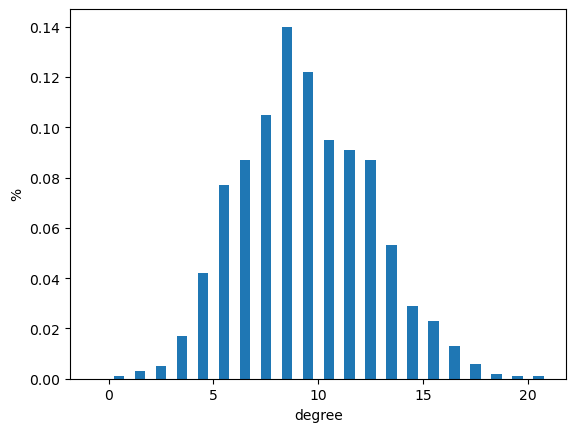

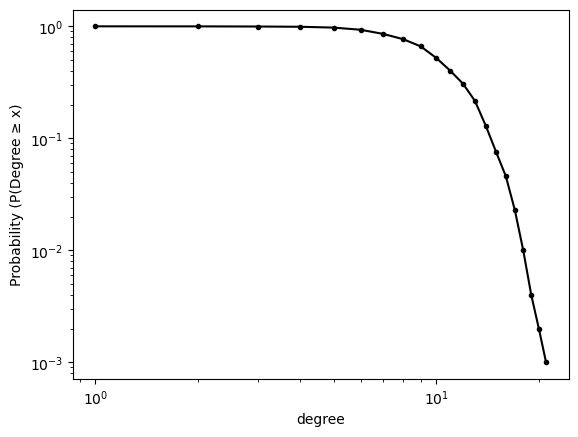

In [14]:
#TODO: set correct labels for the degree distribution
degree_distribution_x_label = 'degree' # replace
degree_distribution_y_label = '%' # replace 

# YOUR CODE HERE
degrees = get_degrees(nx.erdos_renyi_graph(1000,0.01))
fig = calculate_and_plot_discrete_distribution(degrees, degree_distribution_x_label, degree_distribution_y_label)

degree_distribution_fig_fname = 'Copenhagen_FB_degrees.pdf'
fig.savefig(degree_distribution_fig_fname)

#TODO: set correct labels for the 1-CDF
cdf_x_label = 'degree' # replace
cdf_y_label = 'Probability (P(Degree ≥ x)' # replace
# YOUR CODE HERE

cdf_x_values, cdf_vals = cdf(degrees)
fig = plot_distribution(1 - cdf_vals, cdf_x_values, 'logplot', cdf_x_label, cdf_y_label) 
# 1-cdf is the so-called complementary cumulative distribution. 

ccdf_fig_fname = 'Copenhagen_FB_CCDF.pdf'
fig.savefig(ccdf_fig_fname)